In [40]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, rcParams
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
rcParams['figure.figsize'] = 11,10
import joblib
link = '../Datasets/hit400Dataset.csv'

In [41]:
df = pd.read_csv(link)

#  EXPLORATORY DATA ANALYSIS
> a basic overview of the dataset, its features and statistics including data types

In [42]:
df.head()

,amount,account_age,holder_age,account_balance,transaction_time,entry_type,gender,broswer,avs,cvv,connection_type,card_number,account_type,location,bank,label
0,7025,4030,53,1230,5,magnetic strip,female,Mozilla/5.0,n,6348,https,465,debit,Bulawayo,First Capital Bank,True
1,4438,5587,47,1663,10,online,male,Chrome/41.0.2272.89,y,2744,http,681,debit,Harare,Agribank,False
2,5271,7440,24,1602,10,online,female,lk/41.0.2272.89,n,5105,https,262,debit,Bulawayo,Steward Bank,True
3,7878,5776,51,2808,1,chip,female,Mozilla/5.0,y,2369,http,552,debit,Harare,BANC ABC,False
4,1339,6597,52,4526,10,chip,female,Chrome/41.0.2272.89,y,6225,https,297,debit,Rusape,Agribank,False


In [43]:
df.info()
#checking feature data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   amount            35000 non-null  int64 
 1   account_age       35000 non-null  int64 
 2   holder_age        35000 non-null  int64 
 3   account_balance   35000 non-null  int64 
 4   transaction_time  35000 non-null  int64 
 5   entry_type        35000 non-null  object
 6   gender            35000 non-null  object
 7   broswer           35000 non-null  object
 8   avs               35000 non-null  object
 9   cvv               35000 non-null  int64 
 10  connection_type   35000 non-null  object
 11  card_number       35000 non-null  int64 
 12  account_type      35000 non-null  object
 13  location          35000 non-null  object
 14  bank              35000 non-null  object
 15  label             35000 non-null  bool  
dtypes: bool(1), int64(7), object(8)
memory usage: 4.0+ MB


# CHECKING FOR MISSING VALUES
> most machine learning algorithms can not handle missing values, so we have to identify them and fill them out

In [44]:
df.isnull().sum()
#checking for missing values

amount              0
account_age         0
holder_age          0
account_balance     0
transaction_time    0
entry_type          0
gender              0
broswer             0
avs                 0
cvv                 0
connection_type     0
card_number         0
account_type        0
location            0
bank                0
label               0
dtype: int64

# CHECKING CATAGORICAL VALUES DISTRUBUTION
>understanding the distrubution of catagorical values in catagorical features

In [45]:
df['bank'].value_counts()
#checking the distrubuting of catagories in the bank attributes

bank
Agribank              13618
FBC Bank               4664
Steward Bank           4480
BANC ABC               4390
CBZ Bank               4043
First Capital Bank     3805
Name: count, dtype: int64

In [46]:
df['account_type'].value_counts()
    #checking the distrubution of catagories in the card type attributes

account_type
debit     18218
credit    16782
Name: count, dtype: int64

In [47]:
df['entry_type'].value_counts()
    #checking the distrubution of catagories in the location attributes

entry_type
online            14169
chip              13186
magnetic strip     7645
Name: count, dtype: int64

# DATA VISUALISATION
>making use of graphhs to further explore the dataset, identify relationships and trends

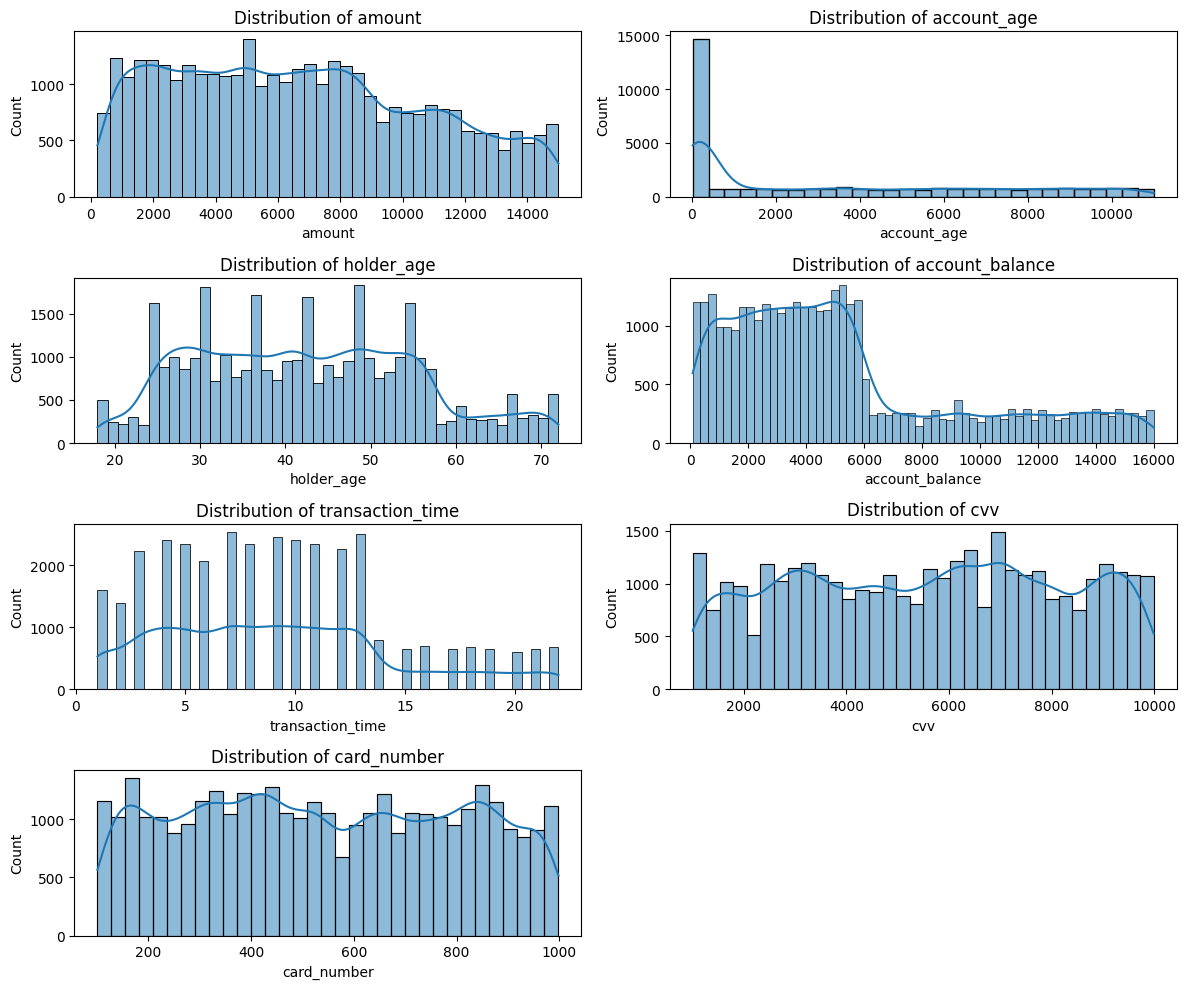

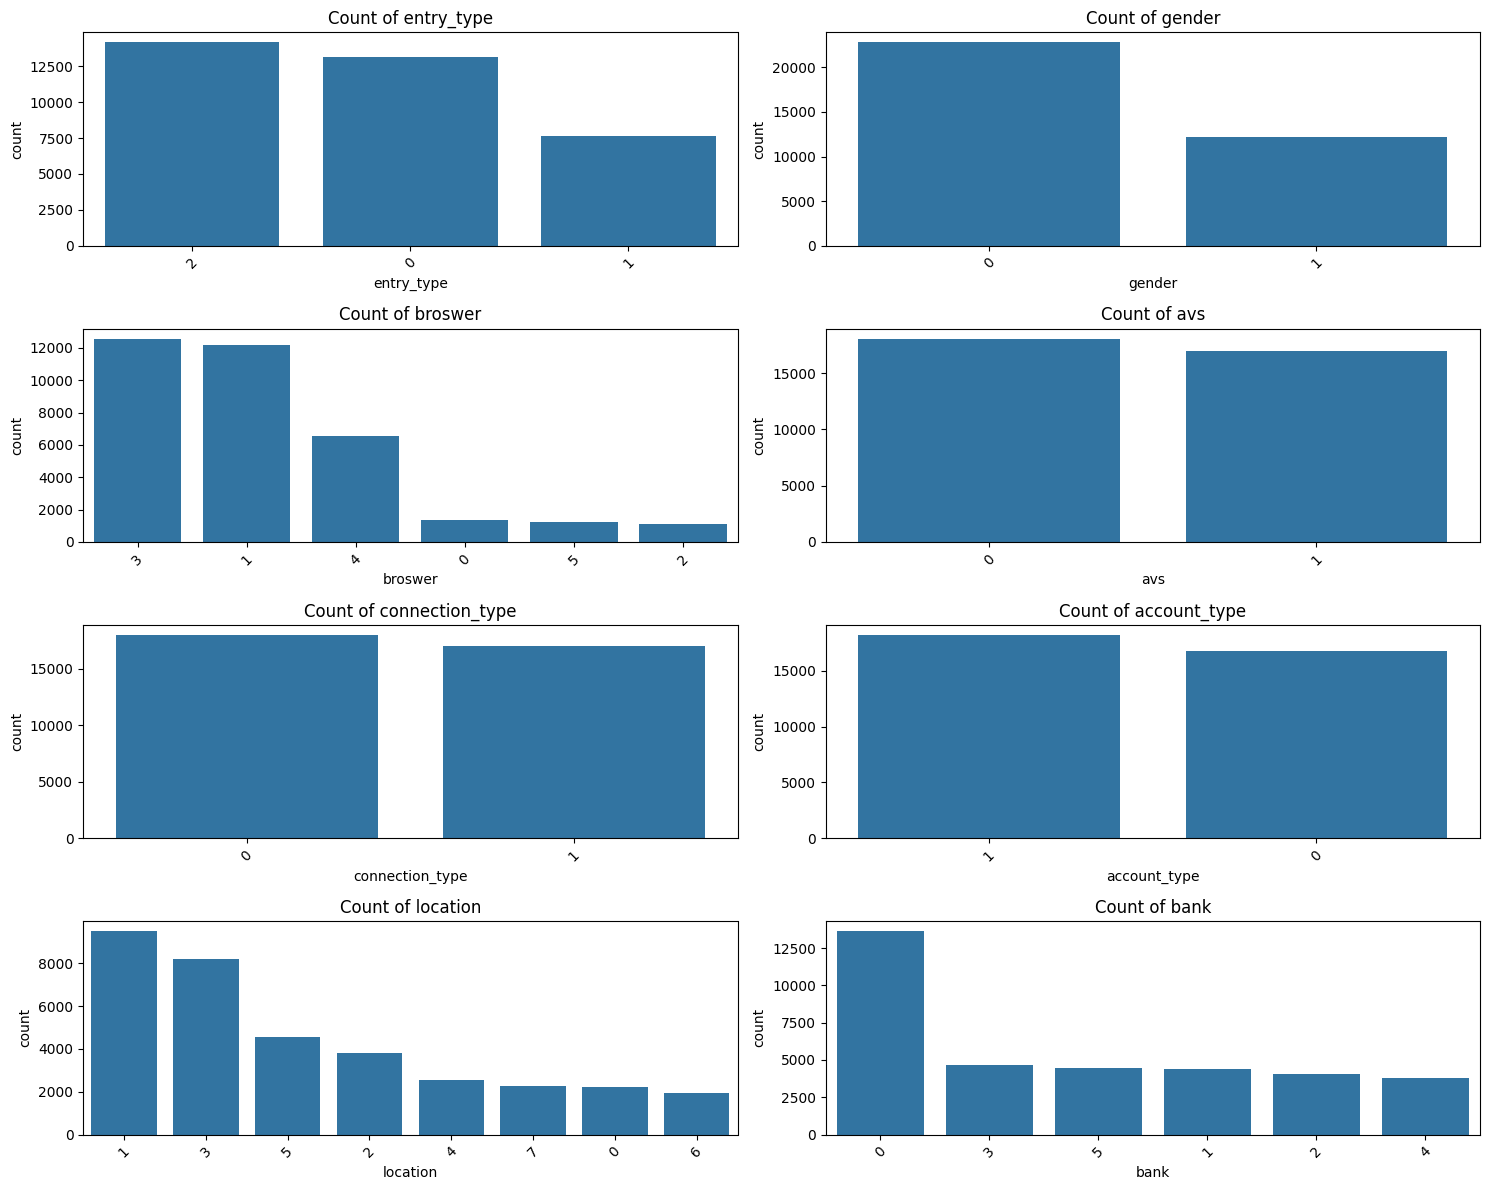

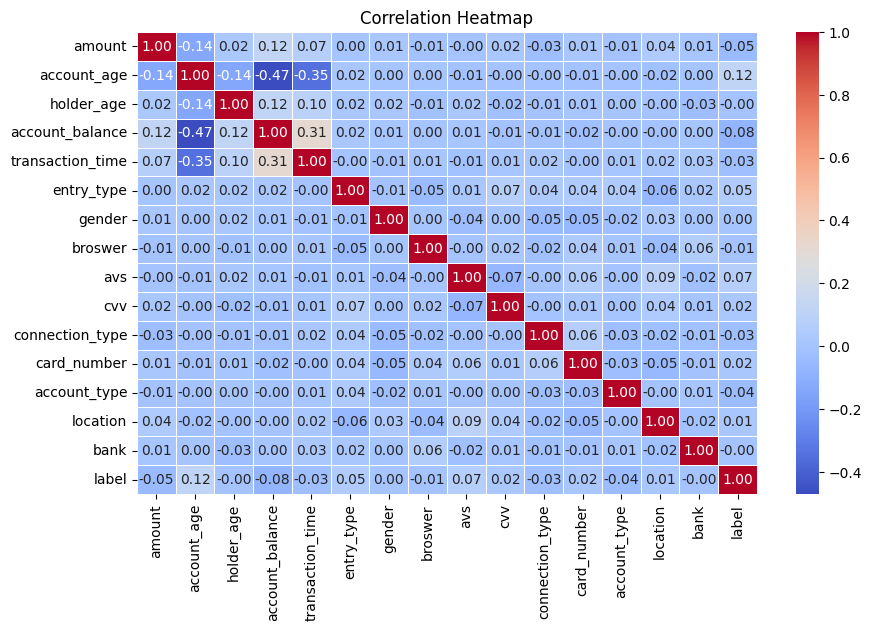

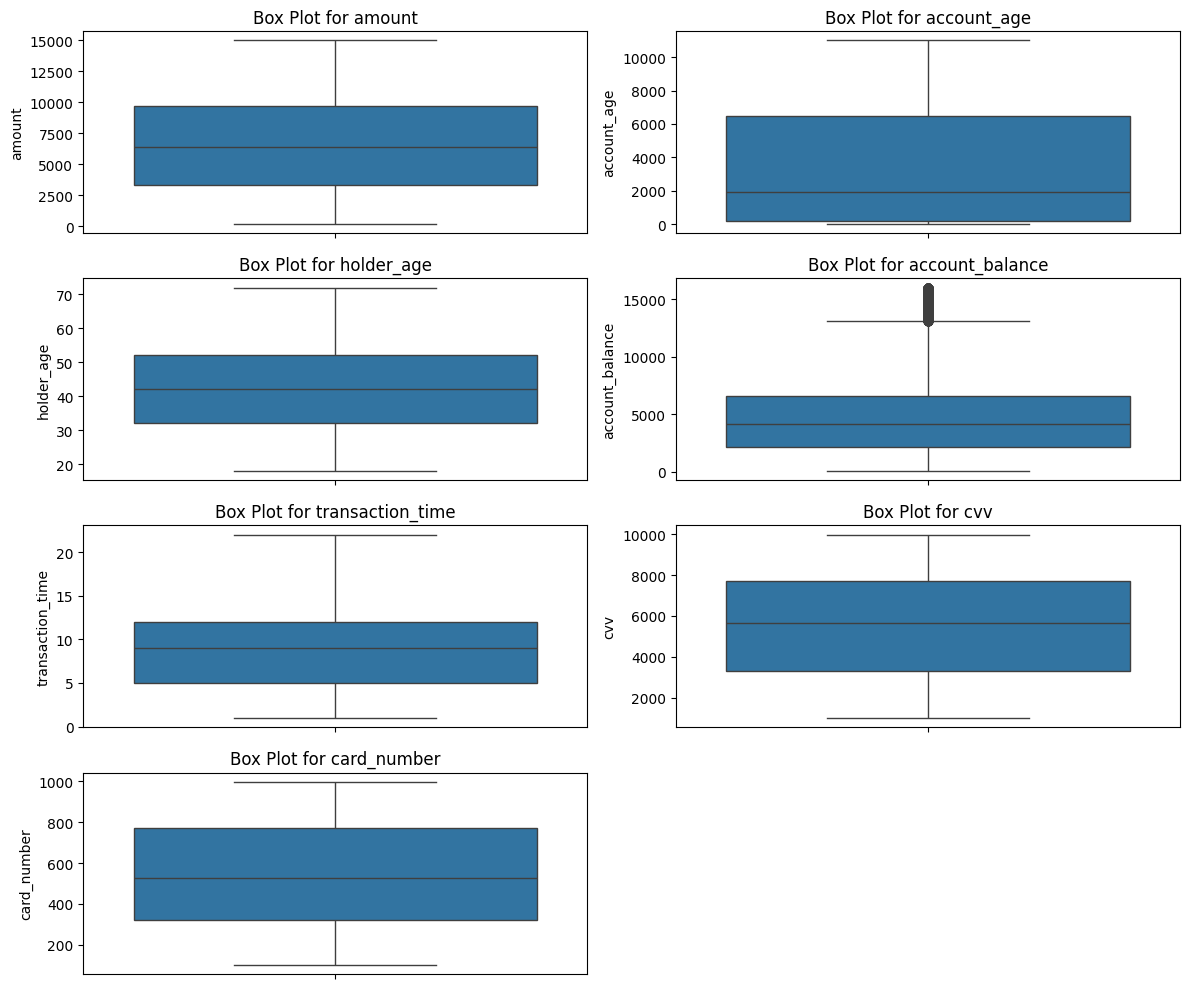

C:\Users\usar\AppData\Local\Temp\ipykernel_27364\1459802042.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set2')


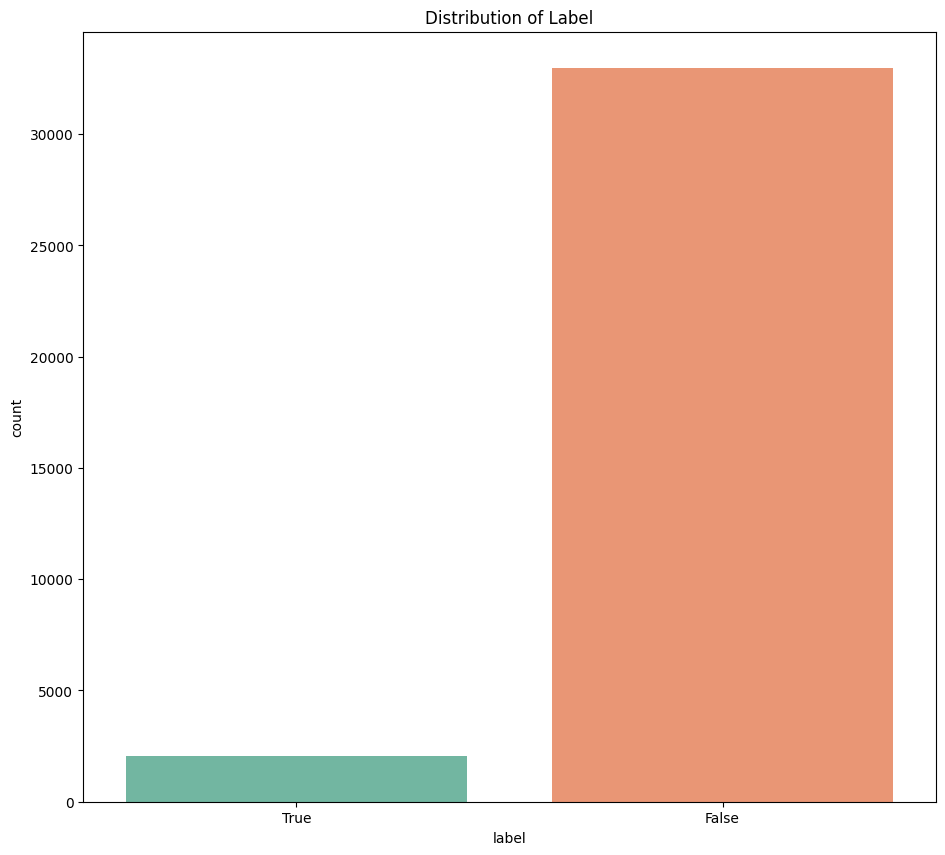

In [48]:

# Data Cleaning: Convert numeric columns and fill invalid entries
numeric_cols = ['amount', 'account_age', 'holder_age', 'account_balance', 'transaction_time', 'cvv', 'card_number']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(df[col].median())

# Encode Categorical Data
encoder = LabelEncoder()
categorical_features = ['entry_type', 'gender', 'broswer', 'avs', 'connection_type', 'account_type', 'location', 'bank']
for col in categorical_features:
    df[col] = encoder.fit_transform(df[col])

# Distribution of Numerical Features
plt.figure(figsize=(12, 10))  # Adjusted layout for 7 numeric features
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 2, i + 1)  # Changed grid size to fit all features
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Count plots for categorical features
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_features):
    plt.subplot(4, 2, i + 1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Box Plot for Outlier Detection in Numeric Features
plt.figure(figsize=(12, 10))  # Adjusted grid layout for 7 numeric features
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot for {col}')
plt.tight_layout()
plt.show()

# Count Plot for Target Label
df['label'] = df['label'].astype(str)  # Ensure 'label' is treated as a categorical feature
sns.countplot(data=df, x='label', palette='Set2')
plt.title('Distribution of Label')
plt.show()


In [49]:
df['label'].value_counts()
#checking the distrubution of catagories in the data label

label
False    32955
True      2045
Name: count, dtype: int64

In [50]:
#defing the outlier fraction for the local Outlier Facto r algorithm
fraud = df[df['label'] == 1]
normal = df[df['label'] == 0] 
outlier_fraction =  len(fraud) / float(len(normal) +1)
outlier_fraction

0.0

# IMPORTING CRITICAL PACKAGES

In [51]:
from river import compose
from river import preprocessing
from river import linear_model
from river import metrics
from river import tree
from river import neighbors
from river import ensemble
from river import stream

#  INITIALIZING CLASSIFICATION ALGORITHMS AND CREATING PIPELINES 

#  FITTING, TRAINING AND TESTING MODELS
> using the river-ml package we can stream data inorder to simulate production enviroment, this also enables our model to learn from a single set of input at a time. The model has the the ability to learn and predict at the same time.

In [52]:
import pandas as pd
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

# Assuming df is your DataFrame and 'label' is the column for labels
X = df.drop(columns=['label'])  # Replace 'label' with your actual label column name
y = df['label']

# Train-Test Split (this ensures that you have unseen data to evaluate on)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize metrics for evaluation
roc_auc = []
conf_matrix = []
classification_reports = []

# Define the first model using RandomForestClassifier
model1 = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Define the second model using LogisticRegression
model2 = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])

# Define the third model using AdaBoostClassifier with DecisionTreeClassifier
model3 = Pipeline([
     ('scaler', StandardScaler()),
     ('ada_boost', AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42))
])

# Define the fourth model using DecisionTreeClassifier
model4 = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(random_state=42))
])

# Group all models into a dictionary
models = {
    'Random Forest Classifier': model1, 
    'Logistic Regression': model2, 
    'AdaBoost Classifier': model3, 
    'Decision Tree Classifier': model4
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Train and evaluate each model using cross-validation
for model_name, model in models.items():
    print(f"{model_name}")
    
    try:
        # Perform cross-validation and collect metrics
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
        
        # Evaluate the model on the test set (unseen data)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # For binary classification, use the probability for the positive class
        
        # Collect evaluation metrics
        roc_auc.append(roc_auc_score(y_test, y_pred_proba))
        conf_matrix.append(confusion_matrix(y_test, y_pred))
        classification_reports.append(classification_report(y_test, y_pred))
        
        # Output evaluation results
        print(f"Cross-Validation ROCAUC Scores: {cv_scores}")
        print(f"Average Cross-Validation ROCAUC: {cv_scores.mean()}")
        print(f"ROCAUC Score on Test Set: {roc_auc[-1]}")
        print(f"{model_name} :Classification Report")
        print(classification_reports[-1])
        print(f"{model_name} :Confusion Matrix")
        print(conf_matrix[-1])
        print("<--------------------------->")
    
    except Exception as e:
        print(f"Skipping model {model_name} due to error: {e}")
        continue  # Skip faulty models


Random Forest Classifier
Cross-Validation ROCAUC Scores: [0.93826691 0.91844116 0.93277635 0.92137456 0.93640475]
Average Cross-Validation ROCAUC: 0.9294527448087132
ROCAUC Score on Test Set: 0.927185724137196
Random Forest Classifier :Classification Report
              precision    recall  f1-score   support

       False       0.99      0.99      0.99      6602
        True       0.87      0.86      0.86       398

    accuracy                           0.98      7000
   macro avg       0.93      0.93      0.93      7000
weighted avg       0.98      0.98      0.98      7000

Random Forest Classifier :Confusion Matrix
[[6549   53]
 [  56  342]]
<--------------------------->
Logistic Regression


c:\projects\python\Real-Time-Credit-Card-Transaction-Fraud-Detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\projects\python\Real-Time-Credit-Card-Transaction-Fraud-Detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\projects\python\Real-Time-Credit-Card-Transaction-Fraud-Detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

Cross-Validation ROCAUC Scores: [0.67809411 0.676835   0.67674936 0.68158789 0.71731959]
Average Cross-Validation ROCAUC: 0.6861171897313876
ROCAUC Score on Test Set: 0.6909726609417887
Logistic Regression :Classification Report
              precision    recall  f1-score   support

       False       0.94      1.00      0.97      6602
        True       0.00      0.00      0.00       398

    accuracy                           0.94      7000
   macro avg       0.47      0.50      0.49      7000
weighted avg       0.89      0.94      0.92      7000

Logistic Regression :Confusion Matrix
[[6602    0]
 [ 398    0]]
<--------------------------->
AdaBoost Classifier


c:\projects\python\Real-Time-Credit-Card-Transaction-Fraud-Detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\projects\python\Real-Time-Credit-Card-Transaction-Fraud-Detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\projects\python\Real-Time-Credit-Card-Transaction-Fraud-Detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

Cross-Validation ROCAUC Scores: [0.78426978 0.75268963 0.75828399 0.75985395 0.80787965]
Average Cross-Validation ROCAUC: 0.772595399648254
ROCAUC Score on Test Set: 0.7741334664841932
AdaBoost Classifier :Classification Report
              precision    recall  f1-score   support

       False       0.94      1.00      0.97      6602
        True       0.00      0.00      0.00       398

    accuracy                           0.94      7000
   macro avg       0.47      0.50      0.49      7000
weighted avg       0.89      0.94      0.92      7000

AdaBoost Classifier :Confusion Matrix
[[6602    0]
 [ 398    0]]
<--------------------------->
Decision Tree Classifier
Cross-Validation ROCAUC Scores: [0.93030714 0.9104788  0.93319615 0.91134265 0.93026105]
Average Cross-Validation ROCAUC: 0.9231171577811674
ROCAUC Score on Test Set: 0.9257638921660711
Decision Tree Classifier :Classification Report
              precision    recall  f1-score   support

       False       0.99      0.99   

# PLOTTING ACCURACY SCORES

In [53]:
# Create a dictionary to store the accuracy scores of the classifiers
stats = {}

# Calculate accuracy for each model and store it in the stats dictionary
for model_name, model in models.items():
     accuracy = model.score(X_test, y_test)
     stats[model_name] = accuracy

# Display the stats dictionary
stats

{'Random Forest Classifier': 0.9844285714285714,
 'Logistic Regression': 0.9431428571428572,
 'AdaBoost Classifier': 0.9431428571428572,
 'Decision Tree Classifier': 0.985}

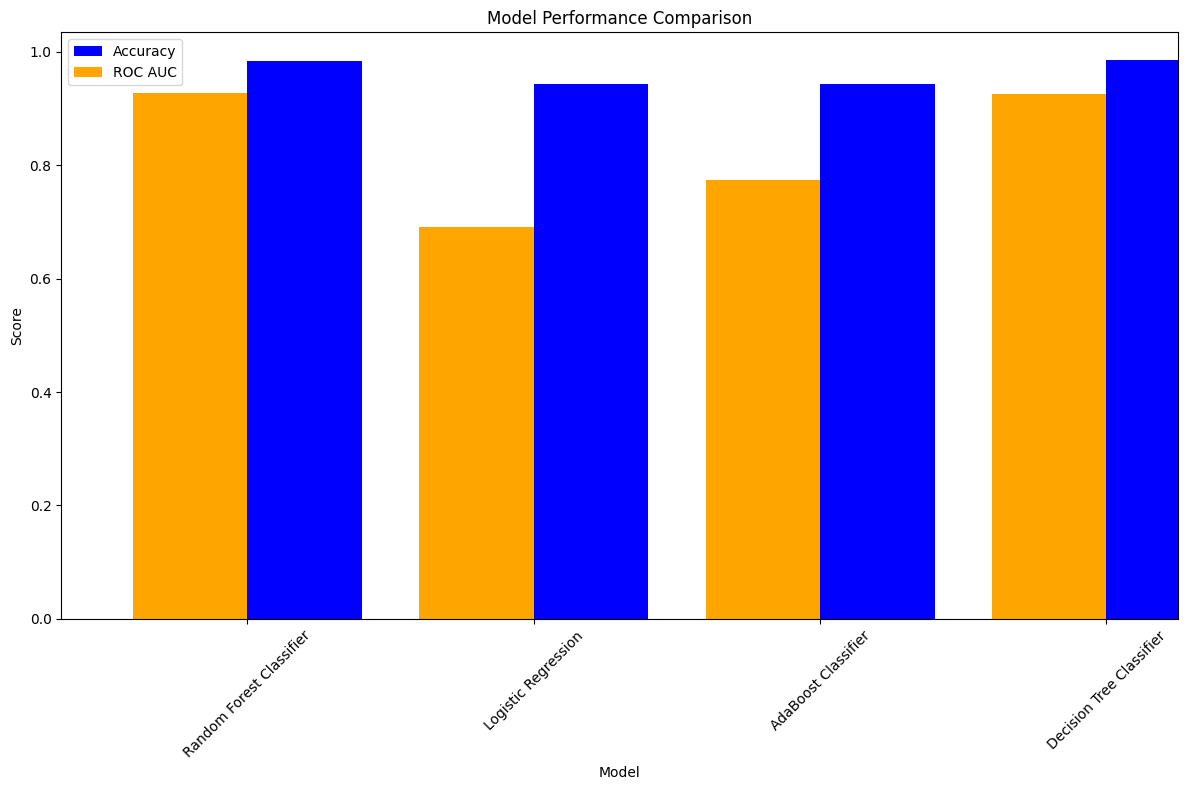

In [54]:
import matplotlib.pyplot as plt

# Extract model names, accuracy scores, and ROC AUC scores
model_names = list(stats.keys())
accuracy_scores = list(stats.values())
roc_auc_scores = roc_auc

# Create a DataFrame for easier plotting
results_df = pd.DataFrame({
     'Model': model_names,
     'Accuracy': accuracy_scores,
     'ROC AUC': roc_auc_scores
})

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(12, 8))

# Plot accuracy scores
results_df.plot(kind='bar', x='Model', y='Accuracy', ax=ax, color='blue', position=0, width=0.4, label='Accuracy')

# Plot ROC AUC scores
results_df.plot(kind='bar', x='Model', y='ROC AUC', ax=ax, color='orange', position=1, width=0.4, label='ROC AUC')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# HYPERPARAMETER TUNING
> in-order to improve the overal perfomance of the model. To be perfomed using grid search 